# SAT and ACT 2017-18 Analysis and Recommendations

analysis by David Trichter


## Problem Statement

The SAT has positioned itself to compete as both the best entrance exam for both colleges to measure student potential, and for students to prepare for the rigors of an undergraduate college education.  To best serve that vision, College Board must find ways to strategically use it's budget to expand beyond the current test taking base.

In order to do so, we will strategically conduct an exploratory data analysis of participation and score results from recent SAT and competitor (the ACT) exams in order to determine an optimized strategy to improve performance.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [2]:
#Code:
!pwd
sat = pd.read_csv('../data/sat_2017.csv')
act = pd.read_csv('../data/act_2017.csv')

/Users/davidtrichter/Desktop/DSI/Submissions/Projects/project_1/code


#### Data Description
The data provided illustrates participation rates, and average scores across subject sections for the SAT and ACT exams, as well as composite averages by state. 

In [3]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### Data Observations

There are a few noticeable errors.  The main one is the absence of a national SAT average.  Wyoming's composite ACT score has an 'x' in it.  Maryland's SAT math score and ACT science score are impossible based on the scoring system.  If I had the access, I would also want to double check the participation rates for some of the states, but they may be accurate!

SAT minimum scores are 200 per section.  Total minimum score is 400.
ACT minimum scores are 1 on each section, with a composite average of each of the four sections.

The main issue for comparison will be that the SAT sections are added together, and the ACT sections are averaged together

#### Data Cleaning

In [5]:
sat['Math'].min()   #Find the location of the impossibly low SAT 'Math' value

52

In [6]:
sat.loc[sat['Math'] == sat['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [7]:
sat.at[20, 'Math'] = 524  #Change Maryland SAT 'Math' value from 52 to 524

In [8]:
act['Science'].min()  

2.3

In [9]:
act.loc[act['Science'] == act['Science'].min()] #Find the location of the impossibly low ACT 'Science' value

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [10]:
act.at[21,'Science'] = 23.2  #Change Maryland 'Science' value from 2.3 to 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
#code
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [12]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  Participation rates for both exams and the composite score for the ACT are objects, but should be int64.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [14]:
#Convert 2017 SAT 'Participation' to a float

sat['Participation'] = sat['Participation'].str.replace('%','')
sat['Participation'] = sat['Participation'].astype(float)

In [15]:
act['Composite'] = act['Composite'].str.replace('x','')  #error message thrown to find the 'x' in a value (wink, wink)

In [16]:
#Convert 2017 ACT 'Participation' to a float
act['Participation'] = act['Participation'].str.replace('%','')
act[['Participation', 'Composite']] = act[['Participation', 'Composite']].astype(float)

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [17]:
#code
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [18]:
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
act.head(1)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [20]:
sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [21]:
#to streamline lower case and snake case SAT and ACT columns
def column_renamer(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")

#     for i in df.columns:
#         if 'composite' in df.columns:
#             df.columns = [i + '_act']
#         elif 'total' in df.columns:
#             df.columns = [i + '_sat']
#         else:
#             pass

    
    
    

In [22]:
column_renamer(act)

In [23]:
act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [24]:
act.rename(columns={'state' : 'state',
                    'participation' : '2017_act_participation', 
                    'english' : '2017_act_english',
                    'math' : '2017_act_math', 
                    'reading' : '2017_act_reading', 
                    'science' : '2017_act_science',
                    'composite' : '2017_act_composite'},
                    inplace = True)

In [25]:
act.columns

Index(['state', '2017_act_participation', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite'],
      dtype='object')

In [26]:
column_renamer(sat)

In [27]:
sat.columns

Index(['state', 'participation', 'evidence-based_reading_and_writing', 'math',
       'total'],
      dtype='object')

In [28]:
sat.rename(columns={'state' : 'state',
                    'participation' : '2017_sat_participation', 
                    'evidence-based_reading_and_writing' : '2017_sat_erw', 
                    'math' : '2017_sat_math',
                    'total' : '2017_sat_total'},
                    inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|2017-18 ACT/SAT Exams|This is an example| 
|**2017_sat_participation**|float64|2017-18 ACT/Sat Exams| The SAT participation rate in the state in 2017.
|**2017_sat_erw**|int64|2017-18 ACT/Sat Exams|The state's 2017 SAT Evidence-Based Reading & Writing mean section score.
|**2017_sat_math**|int64|2017-18 ACT/Sat Exams|The state's 2017 SAT Math mean section score.
|**2017_sat_total**|int64|2017-18 ACT/Sat Exams|The state's mean 2017 SAT Total Score.   
|**2017_act_participation**|float64|2017-18 ACT/Sat Exams|The ACT participation rate in the state in 2017.
|**2017_act_english**|float64|2017-18 ACT/Sat Exams|The state's 2017 ACT English mean section score.
|**2017_act_math**|float64|2017-18 ACT/Sat Exams|The state's 2017 ACT Math mean section score.
|**2017_act_reading**|float64|2017-18 ACT/Sat Exams|The state's 2017 ACT Reading mean section score.
|**2017_act_science**|float64|2017-18 ACT/Sat Exams|The state's 2017 ACT Science mean section score.
|**2017_act_composite**|float64|2017-18 ACT/Sat Exams|The state's mean 2017 ACT Composite score. The 4 section scores, averaged.
|**2018_sat_participation**|float64|2017-18 ACT/Sat Exams| The SAT participation rate in the state in 2018.
|**2018_sat_erw**|int64|2017-18 ACT/Sat Exams|The state's 2018 SAT Evidence-Based Reading & Writing mean section score.
|**2018_sat_math**|int64|2017-18 ACT/Sat Exams|The state's 2018 SAT Math mean section score.
|**2018_sat_total**|int64|2017-18 ACT/Sat Exams|The state's mean 2018 SAT Total Score.   
|**2018_act_participation**|float64|2017-18 ACT/Sat Exams|The ACT participation rate in the state in 2018.
|**2018_act_english**|float64|2017-18 ACT/Sat Exams|The state's 2018 ACT English mean section score.
|**2018_act_math**|float64|2017-18 ACT/Sat Exams|The state's 2018 ACT Math mean section score.
|**2018_act_reading**|float64|2017-18 ACT/Sat Exams|The state's 2018 ACT Reading mean section score.
|**2018_act_science**|float64|2017-18 ACT/Sat Exams|The state's 2018 ACT Science mean section score.
|**2018_act_composite**|float64|2017-18 ACT/Sat Exams|The state's mean 2018 ACT Composite score. The 4 section scores, averaged.



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
act.drop([0], inplace=True)  #Drop the national row (first row)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
#Merge the 2017 SAT and ACT test scores using the 'state' column as an index
test_scores_2017 = pd.merge(sat, act, on="state")

In [31]:
test_scores_2017.head(3)

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [32]:
#save the combined 2017 test scores to file
test_scores_2017.to_csv('../data/test_scores_2017')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [33]:
sat_2018 = pd.read_csv('../data/sat_2018.csv', header = None, 
                       names = ['state', '2018_sat_participation', '2018_sat_erw', '2018_sat_math', '2018_sat_total'])

In [34]:
sat_2018.head()

,state,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [35]:
act_2018 = pd.read_csv('../data/act_2018.csv', sep = '\t', header = None,
                      names = ['state', '2018_act_participation', '2018_act_english', '2018_act_math',
       '2018_act_reading', '2018_act_science', '2018_act_composite'])

In [36]:
act_2018['2018_act_participation'] = act_2018['2018_act_participation'].replace('Not given', np.nan)
act_2018['2018_act_participation'] = act_2018['2018_act_participation'].astype(float)

In [37]:
act_2018['2018_act_participation'].dtype

dtype('float64')

In [38]:
#Convert 2018 SAT 'Participation' to a float

sat_2018['2018_sat_participation'] = sat_2018['2018_sat_participation'].str.replace('%','')
sat_2018['2018_sat_participation'] = sat_2018['2018_sat_participation'].astype(float)

In [39]:
sat_2018.head()

,state,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
#Merge the 2017 SAT and ACT test scores using the 'state' column as an index
test_scores_2018 = pd.merge(sat_2018, act_2018, on="state")

In [41]:
#Merge the 2017 and 2018 SAT and ACT test scores using the 'state' column as an index
final_test_scores = pd.merge(test_scores_2017, test_scores_2018, on="state")

In [42]:
final_test_scores.head()

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [43]:
#save the combined 2017 test scores to file
final_test_scores.to_csv('../data/final_test_scores')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
final_test_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2017_sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017_sat_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017_act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
2017_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
2017_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
2017_act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
2017_act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
#Standard Deviation Formula
import math
stdev = 0

for i in final_test_scores['2017_sat_erw']:
    stdev += ( ((i - final_test_scores['2017_sat_erw'].mean()) **2) / len(final_test_scores['2017_sat_erw']))
stdev = math.sqrt(stdev)

print(stdev)

45.21697020437867


In [46]:
np.std(final_test_scores['2017_sat_erw'])

45.21697020437866

In [47]:
#Standard Deviation Formula Function
def stdev_hand(df, column):
    import math
    stdev = 0

    for i in df[column]:
        stdev += ( ((i - df[column].mean()) **2) / len(df[column]))
    stdev = math.sqrt(stdev)

    return stdev

In [48]:
#stdev_hand example

stdev_hand(final_test_scores,'2017_sat_erw')

45.21697020437867

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
#Create a subset dataframe of numeric columns

numeric_columns = final_test_scores.keys().drop('state')

In [50]:
#Listed numeric columns

numeric_columns

Index(['2017_sat_participation', '2017_sat_erw', '2017_sat_math',
       '2017_sat_total', '2017_act_participation', '2017_act_english',
       '2017_act_math', '2017_act_reading', '2017_act_science',
       '2017_act_composite', '2018_sat_participation', '2018_sat_erw',
       '2018_sat_math', '2018_sat_total', '2018_act_participation',
       '2018_act_english', '2018_act_math', '2018_act_reading',
       '2018_act_science', '2018_act_composite'],
      dtype='object')

In [51]:
#Create a dictionary variable of column names and standard deviation across the category.

sd = {col: stdev_hand(final_test_scores, col) for col in numeric_columns}

In [52]:
#Listed
sd

{'2017_sat_participation': 34.929070766645076,
 '2017_sat_erw': 45.21697020437867,
 '2017_sat_math': 46.65713364485504,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 31.824175751231795,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.722216145144367,
 '2017_act_composite': 2.0007860815819893,
 '2018_sat_participation': 36.94661922353941,
 '2018_sat_erw': 47.03460978357608,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.22742384464433,
 '2018_act_participation': nan,
 '2018_act_english': 2.0855261815801143,
 '2018_act_math': 2.42225361432028,
 '2018_act_reading': 2.015707255555718,
 '2018_act_science': 2.145891884510421,
 '2018_act_composite': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:** They are close, but the numbers after the decimal place are off.  Numpy's std method and my manually calculated method are exactly the same.  

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT? 
    - 2017 ACT? 
    - 2018 ACT? 
     
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?  
    - 2018 SAT? 
    - 2017 ACT?
    - 2018 ACT?  
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?  **Florida, Georgia, Hawaii, South Carolina**

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [53]:
#Lowest 2017 SAT Participation 
final_test_scores[['state','2017_sat_participation']].sort_values(by = ['2017_sat_participation','state'], ascending = [True,True]).head(5)



,state,2017_sat_participation
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0
3,Arkansas,3.0
23,Minnesota,3.0


<u>**The Lowest 2017 SAT Participation Rates in %:**</u>

Iowa	2.0,
Mississippi	2.0,
North Dakota	2.0,
Arkansas	3.0,
Minnesota	3.0

In [54]:
#Highest 2017 SAT Participation 
final_test_scores[['state','2017_sat_participation']].sort_values(by = ['2017_sat_participation','state'], ascending = [False,True]).head(5)


,state,2017_sat_participation
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0
29,New Hampshire,96.0


<u>**The Highest 2017 SAT Participation Rates in %:**</u>

Connecticut	100.0,
Delaware	100.0,
District of Columbia	100.0,
Michigan	100.0,
New Hampshire	96.0

In [55]:
#Lowest 2017 ACT Participation 
final_test_scores[['state','2017_act_participation']].sort_values(by = ['2017_act_participation','state'], ascending = [True,True]).head(5)


,state,2017_act_participation
19,Maine,8.0
7,Delaware,18.0
29,New Hampshire,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


<u>**The Lowest 2017 ACT Participation Rates in %:**</u>

Maine	8.0,
Delaware	18.0,
New Hampshire	18.0,
Rhode Island	21.0,
Pennsylvania	23.0

In [56]:
#Highest 2017 ACT Participation 
final_test_scores[['state','2017_act_participation']].sort_values(by = ['2017_act_participation','state'], ascending = [False,True]).head(20)


,state,2017_act_participation
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


<u>**The Highest 2017 ACT Participation Rates in %:**</u>

Alabama	100.0,
Arkansas	100.0,
Colorado	100.0,
Kentucky	100.0,
Louisiana	100.0,
Minnesota	100.0,
Mississippi	100.0,
Missouri	100.0,
Montana	100.0,
Nevada	100.0,
North Carolina	100.0,
Oklahoma	100.0,
South Carolina	100.0,
Tennessee	100.0,
Utah	100.0,
Wisconsin	100.0,
Wyoming	100.0,
North Dakota	98.0
Illinois	93.0
Hawaii	90.0.  A total of 17 states at 100% participation Plus North Dakota at 98% to make 18 at "full" participation

In [57]:
#Lowest 2018 SAT Participation 
final_test_scores[['state','2018_sat_participation']].sort_values(by = ['2018_sat_participation','state'], ascending = [True,True]).head(15)


,state,2018_sat_participation
34,North Dakota,2.0
15,Iowa,3.0
24,Mississippi,3.0
27,Nebraska,3.0
41,South Dakota,3.0
49,Wisconsin,3.0
50,Wyoming,3.0
16,Kansas,4.0
17,Kentucky,4.0
18,Louisiana,4.0


<u>**The Lowest 2018 SAT Participation Rates in % (Under 5%):**</u>

North Dakota	2.0,
Iowa	3.0,
Mississippi	3.0,
Nebraska	3.0,
South Dakota	3.0,
Wisconsin	3.0,
Wyoming	3.0,
Kansas	4.0,
Kentucky	4.0,
Louisiana	4.0,
Minnesota	4.0,
Missouri	4.0,
Utah	4.0 

In [58]:
#Highest 2018 SAT Participation 
final_test_scores[['state','2018_sat_participation']].sort_values(by = ['2018_sat_participation','state'], ascending = [False,True]).head(10)


,state,2018_sat_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0
13,Illinois,99.0
19,Maine,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


<u>**The Highest 2018 SAT Participation Rates in %:**</u>

Colorado	100.0,
Connecticut	100.0,
Delaware	100.0,
Idaho	100.0,
Michigan	100.0,
Illinois	99.0,
Maine	99.0

In [59]:
#Lowest 2018 ACT Participation 
final_test_scores[['state','2018_act_participation']].sort_values(by = ['2018_act_participation','state'], ascending = [True,True]).head(5)

,state,2018_act_participation
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
22,Michigan,22.0


<u>**Lowest 2018 ACT Participation Rate:**</u>  Maine (7%), Rholde Island (15%), New Hampshire (16%), Delaware (17%), Michigan (22%)

In [60]:
#Lowest 2018 ACT Participation 
final_test_scores[['state','2018_act_participation']].sort_values(by = ['2018_act_participation','state'], ascending = [False,True]).head(16)

,state,2018_act_participation
0,Alabama,100.0
3,Arkansas,100.0
17,Kentucky,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
27,Nebraska,100.0
28,Nevada,100.0
35,Ohio,100.0
40,South Carolina,100.0


<u>**Highest 2018 ACT Participation Rate:**</u>  Alabama, Arkansas, Kentucky, Mississippi, Missouri, Montana,Nebraska, Nevada, Ohio, South Carolina, Tennessee, Utah, Wisconsin, Wyoming, Minnesota, North Dakota all have (100%) participation.

In [61]:
#Comparing the lowest 2018 ACT participation states to 2017

final_test_scores[['state','2018_act_participation','2017_act_participation']].sort_values(by = ['2018_act_participation','2017_act_participation','state'], ascending = [True,True,True]).head(10)



,state,2018_act_participation,2017_act_participation
19,Maine,7.0,8.0
39,Rhode Island,15.0,21.0
29,New Hampshire,16.0,18.0
7,Delaware,17.0,18.0
22,Michigan,22.0,29.0
45,Vermont,24.0,29.0
46,Virginia,24.0,29.0
47,Washington,24.0,29.0
21,Massachusetts,25.0,29.0
6,Connecticut,26.0,31.0


In [62]:
#Comparing the lowest 2017 SAT participation statesto 2018

final_test_scores[['state','2018_sat_participation','2017_sat_participation']].sort_values(by = ['2017_sat_participation','2018_sat_participation','state'], ascending = [True,True,True]).head(10)


,state,2018_sat_participation,2017_sat_participation
34,North Dakota,2.0,2.0
15,Iowa,3.0,2.0
24,Mississippi,3.0,2.0
27,Nebraska,3.0,3.0
41,South Dakota,3.0,3.0
49,Wisconsin,3.0,3.0
50,Wyoming,3.0,3.0
23,Minnesota,4.0,3.0
25,Missouri,4.0,3.0
44,Utah,4.0,3.0


In [63]:
#States with over 50% Participation on both exams in 2018

final_test_scores[(final_test_scores['2018_sat_participation'] > 50) & (final_test_scores['2018_act_participation'] > 50)]

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5


<u>**States with over 50% participation on the SAT/ACT in 2017, 2018**</u>

Florida:  83/73, 56/66

Georgia:  61/55, 70/53

Hawaii:  55/90, 56/89

South Carolina:  50/100,  55/100

**Florida's overall participation rate for both exams has dramatically fallen!**

In [64]:
#mean scores by test
final_test_scores[['2017_act_composite','2018_act_composite','2017_sat_total','2018_sat_total']].mean()

2017_act_composite      21.519608
2018_act_composite      21.345098
2017_sat_total        1126.098039
2018_sat_total        1120.019608
dtype: float64

<u><b>Observations: </b></u>

While participation rates in both exams were largely the same between 2017 and 2018, two states jumped out as anomalies.  Colorado jumped from 11% participation to 100% participation, and Illinois jumped from 9% participation to 99% participation.  Upon further research, both states switched mandatory examination from the ACT to the SAT in 2018.  College Board negotiated free SAT exams for all high school juniors in those states and provide free test prep via Khan Academy.  

Rhode Island also adopted the SAT as mandatory, but since the ACT was not previously mandatory, the swing was not quite as drastic, and it seems less negotiation for switching was necessary.

The larger participation rate jumps in Colorado and Illinois correlate with a precipitous drop in average scores across sections.  However, with a large percentage of mandatory test takers that did not have time to prepare could be expected.  Monitoring and providing quality test prep materials to each successsive cohort of test takers will be necessary.

Lastly, Florida's participation rates on both exams dropped from 83% on the SAT and 73%  on the ACT in 2017, to 56% on the SAT and 66% on the ACT in 2018.

The ACT has a much higher rate of full participation than the SAT in both 2017 and 2018.  However, the biggest movement were from the movement of Colorado and Illinois from full participation on the ACT in 2017 to full participation in 2018 on the SAT.


17 States had full ACT participation in (with one more at 98% to bring to 18) in 2017, all of which could be considered southern and midwest states.  

In 2018 max participation dropped to 14 states (but still essentially 16 with full participation).

Low ACT participation in 2017 and 2018 was Maine:  8% and 7% respectively, followed by Delaware, New Hampshire, Rhode Island, and Pennsylvania (no data for 2018 participation)
The lowest participation rates predominantly occurred in states in the Northeast.

The ACT mean participation in 2017 was:  65% ,
The ACT mean participation in 2018 was:  60%

## Data Visualization



In [65]:
final_test_scores.corr().head()

,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
2017_sat_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.799532,0.639323,0.645332,0.649435,0.651892,0.611675
2017_sat_erw,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.756201,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872
2017_sat_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.789166,0.800380,0.878982,0.849583,0.722132,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104
2017_sat_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.741279,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698
2017_act_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.909656,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334


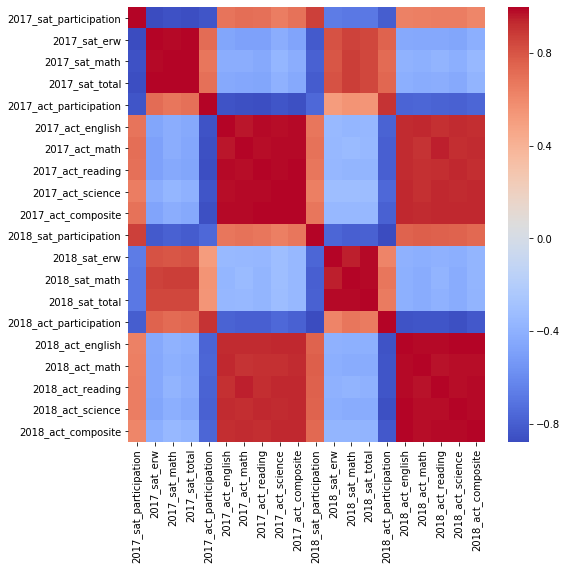

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(final_test_scores.corr(), cmap = 'coolwarm');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [67]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].title.set_text(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

/Users/davidtrichter/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidtrichter/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


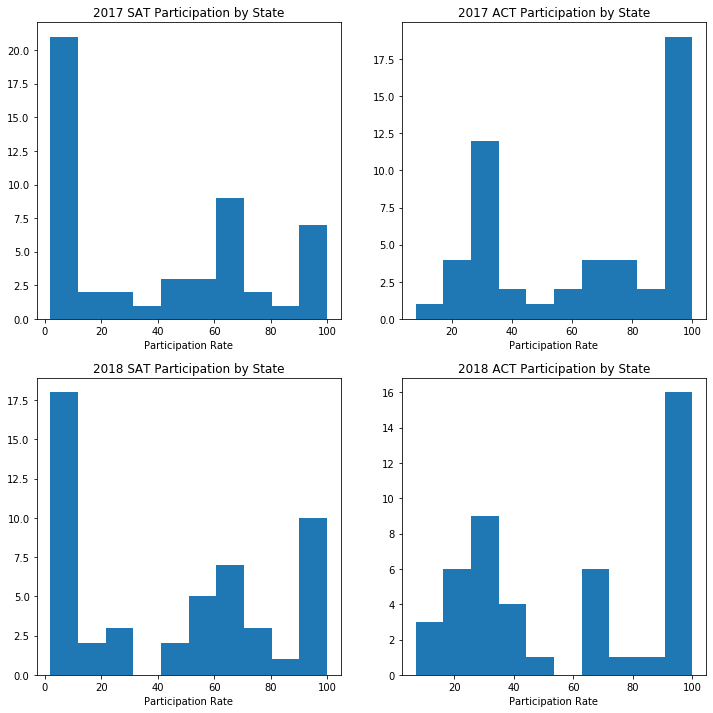

In [68]:
subplot_histograms(final_test_scores,['2017_sat_participation','2017_act_participation','2018_sat_participation','2018_act_participation'],['2017 SAT Participation by State', '2017 ACT Participation by State', '2018 SAT Participation by State','2018 ACT Participation by State'],['Participation Rate','Participation Rate','Participation Rate','Participation Rate'])


There seems to be a zero sum game building between the SAT and ACT.  The ACT has many more 100% particpation states, but is trending towards the SAT from 2017 to 2018.

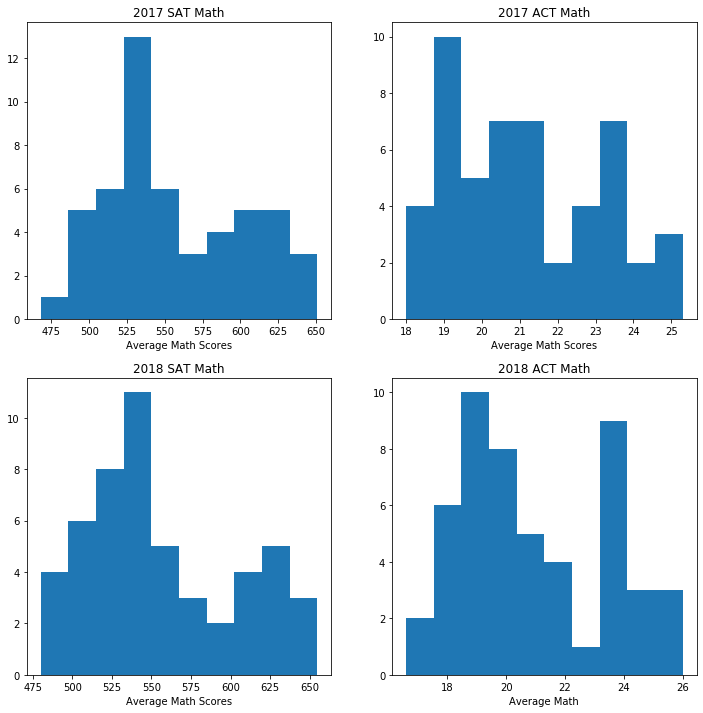

In [69]:
subplot_histograms(final_test_scores,['2017_sat_math','2017_act_math','2018_sat_math','2018_act_math'],
                   ['2017 SAT Math', '2017 ACT Math', '2018 SAT Math','2018 ACT Math'],
                   ['Average Math Scores','Average Math Scores','Average Math Scores','Average Math'])


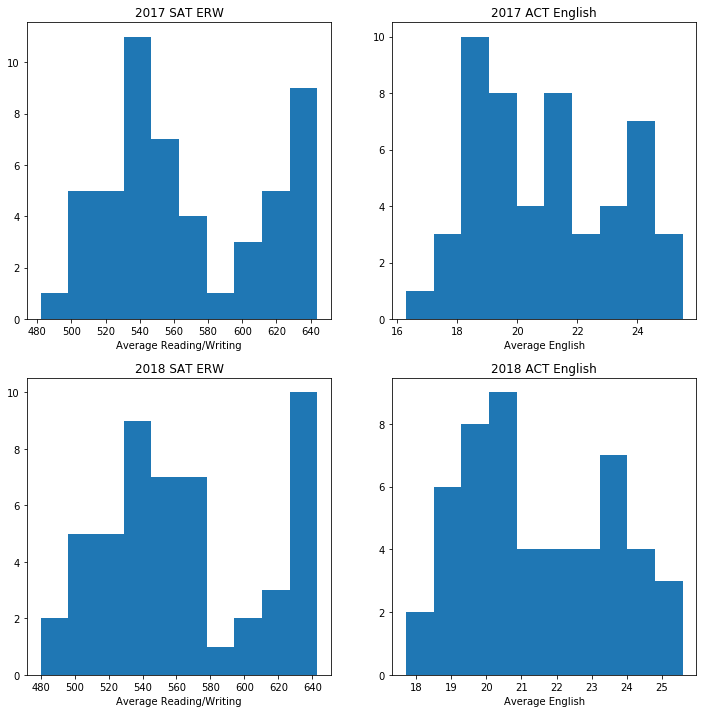

In [70]:
subplot_histograms(final_test_scores,['2017_sat_erw','2017_act_english','2018_sat_erw','2018_act_english'],
                   ['2017 SAT ERW', '2017 ACT English', '2018 SAT ERW','2018 ACT English'],
                   ['Average Reading/Writing','Average English','Average Reading/Writing','Average English'])

As the ACT becomes less mandatory, there are marginal increase in test scores at the expense of the SAT's test scores.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


<Figure size 1152x648 with 0 Axes>

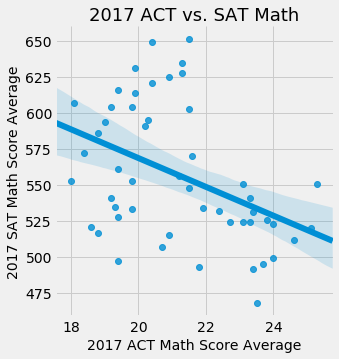

In [71]:
#Scatter plot with regression for 2017 SAT vs. ACT Math Scores
plt.figure(figsize=(16, 9));
plt.style.use('fivethirtyeight')

sns.lmplot(data=final_test_scores,x='2017_act_math',y='2017_sat_math');
ax = plt.gca()
ax.set_title("2017 ACT vs. SAT Math", size = 18);
plt.xlabel("2017 ACT Math Score Average", size = 14)
plt.ylabel("2017 SAT Math Score Average", size = 14)
plt.grid(True)

<Figure size 1152x648 with 0 Axes>

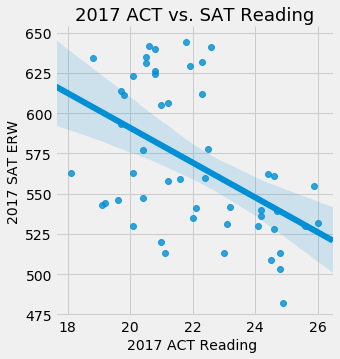

In [72]:
#Scatter plot with regression for 2017 SAT vs. ACT Math Scores
plt.figure(figsize=(16, 9));
plt.style.use('fivethirtyeight')

sns.lmplot(data=final_test_scores,x='2017_act_reading',y='2017_sat_erw');
ax = plt.gca()
ax.set_title("2017 ACT vs. SAT Reading", size = 18);
plt.xlabel("2017 ACT Reading ", size = 14)
plt.ylabel("2017 SAT ERW", size = 14)
plt.grid(True)

<Figure size 1152x648 with 0 Axes>

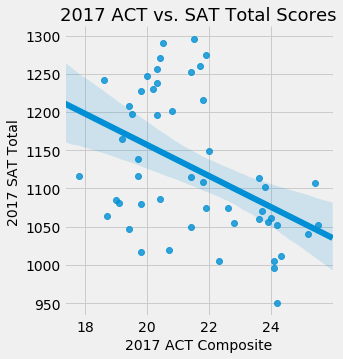

In [73]:
#Scatter plot with regression for 2017 SAT vs. ACT Math Scores
plt.figure(figsize=(16, 9));
plt.style.use('fivethirtyeight')

sns.lmplot(data=final_test_scores,x='2017_act_composite',y='2017_sat_total');
ax = plt.gca()
ax.set_title("2017 ACT vs. SAT Total Scores", size = 18);
plt.xlabel("2017 ACT Composite", size = 14)
plt.ylabel("2017 SAT Total", size = 14)
plt.grid(True)

<Figure size 1152x648 with 0 Axes>

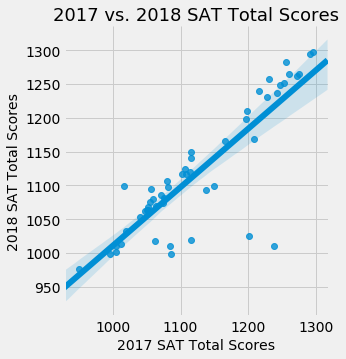

In [74]:
#Scatter plot with regression for 2017 SAT vs. ACT Math Scores
plt.figure(figsize=(16, 9));
plt.style.use('fivethirtyeight')

sns.lmplot(data=final_test_scores,x='2017_sat_total',y='2018_sat_total');
ax = plt.gca()
ax.set_title("2017 vs. 2018 SAT Total Scores", size = 18);
plt.xlabel("2017 SAT Total Scores", size = 14)
plt.ylabel("2018 SAT Total Scores", size = 14)
plt.grid(True)

<Figure size 1152x648 with 0 Axes>

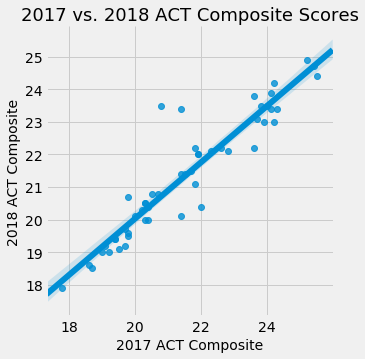

In [75]:
#Scatter plot with regression for 2017 SAT vs. ACT Math Scores
plt.figure(figsize=(16, 9));
plt.style.use('fivethirtyeight')

sns.lmplot(data=final_test_scores,x='2017_act_composite',y='2018_act_composite');
ax = plt.gca()
ax.set_title("2017 vs. 2018 ACT Composite Scores", size = 18);
plt.xlabel("2017 ACT Composite", size = 14)
plt.ylabel("2018 ACT Composite", size = 14)
plt.grid(True)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 0, 'Distribution by State Participation %')

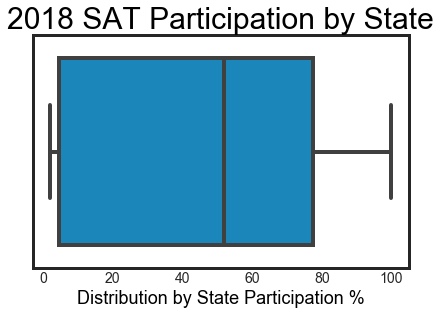

In [76]:
#Boxplot of 2018 SAT Participation.  Outliers are 100%
sns.set_style("white")
sns.boxplot(final_test_scores['2018_sat_participation'])
plt.title("2018 SAT Participation by State", color = 'black', fontsize = 30)
plt.xlabel('Distribution by State Participation %', color = 'black', fontsize = 18)

Text(0.5, 0, 'Distribution by State Participation %')

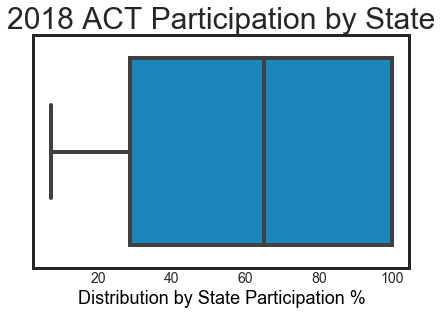

In [77]:
#Boxplot of 2018 ACT Participation.  Outliers are low percentage.  100% is within normal range.

sns.set_style("white")
sns.boxplot(final_test_scores['2018_act_participation'])
plt.title("2018 ACT Participation by State", fontsize = 30)
plt.xlabel('Distribution by State Participation %', color = 'black', fontsize = 18)



In [78]:
final_test_scores.columns

Index(['state', '2017_sat_participation', '2017_sat_erw', '2017_sat_math',
       '2017_sat_total', '2017_act_participation', '2017_act_english',
       '2017_act_math', '2017_act_reading', '2017_act_science',
       '2017_act_composite', '2018_sat_participation', '2018_sat_erw',
       '2018_sat_math', '2018_sat_total', '2018_act_participation',
       '2018_act_english', '2018_act_math', '2018_act_reading',
       '2018_act_science', '2018_act_composite'],
      dtype='object')

In [79]:
#New datafram for ACT sectional analysis

act_sections = final_test_scores.drop(columns = ['state', '2017_sat_participation', 
                                                 '2017_sat_erw', '2017_sat_math','2017_sat_total', 
                                                 '2017_act_participation','2017_act_composite', 
                                                 '2018_sat_participation', '2018_sat_erw','2018_sat_math', 
                                                 '2018_sat_total', '2018_act_participation','2018_act_composite'])

#Reorder sections for comparison
act_sections = act_sections[['2017_act_english','2018_act_english',
                            '2017_act_reading','2018_act_reading',
                            '2017_act_math','2018_act_math',
                            '2017_act_science','2018_act_science']]

In [80]:
act_sections.mean()

2017_act_english    20.931373
2018_act_english    21.486275
2017_act_reading    22.013725
2018_act_reading    21.125490
2017_act_math       21.182353
2018_act_math       20.988235
2017_act_science    21.450980
2018_act_science    22.015686
dtype: float64

In [81]:
#New dataframe for SAT sectional analysis

sat_sections = final_test_scores.drop(columns = ['state', '2017_sat_participation',
                                                '2017_sat_total', '2017_act_participation', '2017_act_english',
                                                '2017_act_math', '2017_act_reading', '2017_act_science',
                                                '2017_act_composite', '2018_sat_participation', '2018_sat_total', 
                                                '2018_act_participation', '2018_act_english', '2018_act_math', 
                                                '2018_act_reading', '2018_act_science', '2018_act_composite'])

#Reorder sections for comparison

sat_sections = sat_sections[['2017_sat_erw','2018_sat_erw',
                            '2017_sat_math','2018_sat_math']]

Text(0.5, 0, '2017 and 2018 SAT Sectional Scores')

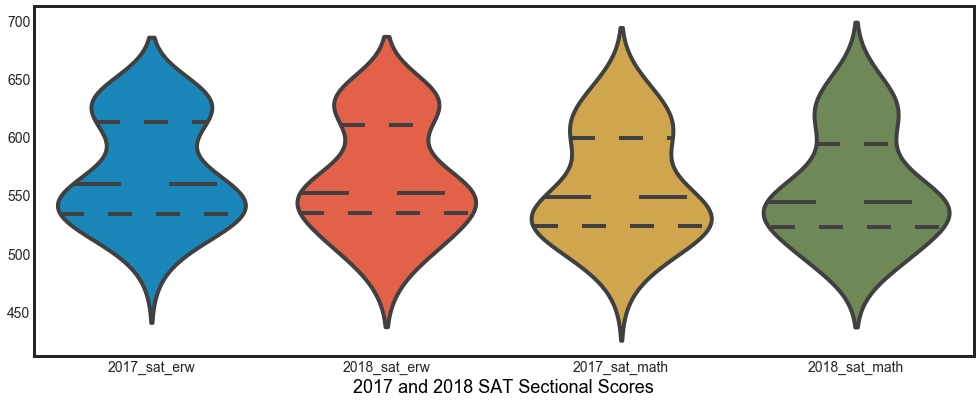

In [82]:
plt.figure(figsize= (15, 6))
sns.violinplot(data = sat_sections, inner = 'quartile')
plt.xlabel('2017 and 2018 SAT Sectional Scores', color = 'black', fontsize = 18)

Text(0.5, 1.0, 'Violin Plot of ACT Scores')

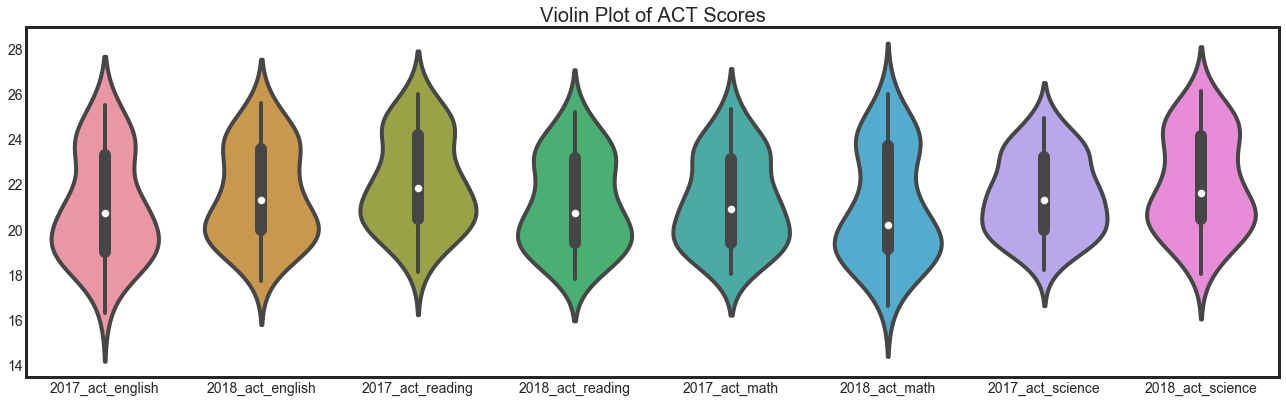

In [83]:
plt.figure(figsize= (20, 6))
sns.violinplot(data = act_sections)

plt.title("Violin Plot of ACT Scores")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<Figure size 1152x648 with 0 Axes>

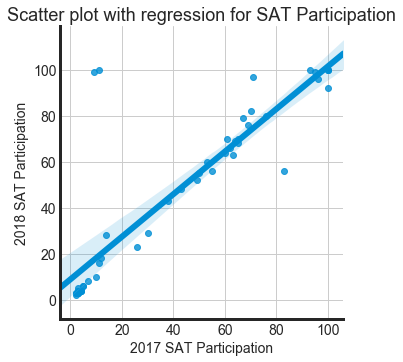

In [84]:
#Scatter plot with regression for SAT Participation
plt.figure(figsize=(16, 9));

sns.lmplot(data=final_test_scores,x='2017_sat_participation',y='2018_sat_participation');
ax = plt.gca()
ax.set_title("Scatter plot with regression for SAT Participation", size = 18);
plt.xlabel("2017 SAT Participation", size =14)
plt.ylabel("2018 SAT Participation", size = 14)
plt.grid(True)

<Figure size 1152x648 with 0 Axes>

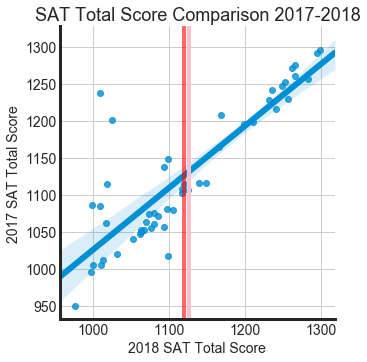

In [85]:
#Scatter plot with regression for SAT Scores
plt.figure(figsize=(16, 9));

sns.lmplot(data=final_test_scores,x='2018_sat_total',y='2017_sat_total')
ax = plt.gca()
ax.set_title("SAT Total Score Comparison 2017-2018", size = 18);
plt.xlabel("2018 SAT Total Score", size =14)
plt.ylabel("2017 SAT Total Score", size = 14)
plt.axvline(final_test_scores['2018_sat_total'].mean(), color = 'red', alpha = .6)
plt.axvline(final_test_scores['2017_sat_total'].mean(), color = 'pink')
plt.grid(True)

In [86]:
change_in_SAT_score = final_test_scores['2018_sat_total'].mean() - final_test_scores['2017_sat_total'].mean()

In [87]:
change_in_SAT_score

-6.078431372548948

In [88]:
final_test_scores.head(1)

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions



For the ACT, states had a mean participation rate of 65.2% with a standard deviation of 32.1 in 2017, compared with a mean participation rate of 60.0% with a standard deviation of 33.5 in 2018.  Approximately an 8 percent decrease in participation. 

For the SAT, states had a mean participation rate of 39.8% with a standard deviation of 35.2 in 2017, compared with a 45.7%, with a standard deviation of 37.3 in 2018. Approximately a 15% increase in participation.


For the ACT, the section mean ranges from 20.9 to 22.0, with a standard deviation range from 1.73 to 2.45.  The ACT's composite scores, respectively for exam year 2017 and 2018, have means of 21.5 and 21.3, and standard deviations of 2.0 and 1.87.  For the SAT, the section mean ranges from 556 to 569 with a standard deviation range from 45.6 to 47.7.  The total scores for 2017 and 2018 respectively have a mean score of 1126 and 1120, with standard deviations of 92.5 and 94.1.  

The standard deviations help provide some insight into the differences in mandatory and volunteer based testing, although there are still too many unknowns to make any strong assumptions.

In [89]:
final_test_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2017_sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017_sat_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017_act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
2017_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
2017_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
2017_act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
2017_act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<u>**Answer:**</u>  For Participation, the data skews right for the ACT, and left for the SAT.  There are more high participation states for the ACT, and low participation states for the SAT.  Since these distributions are impacted by business and politics, from year to year, this is no huge surprise.  However, if we could compare over a 50 year period, it would be reasonable to assume that it would follow the central limit theorem and become normal.  

For scores, the data generally skews to the right for all scores.  There seems to be two classes of students that take the exams.  The mandatory students, and the high achievers.  Given how our mean distributions were calculated (all states treated equal, and mandatory testing treated the same is voluntary testing), it is no large surprise that our distributions have multiple peaks.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 
Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<u>**Answer:**</u>  The overall participation numbers cannot be inferred from this specific data.  It has a low granularity, specifically that there is no population statistic for each state to calculation true participation percentages.  Population from state to state is drastically different, and therefore the percentage of total students that are taking the exam cannot be inferred from these numbers.  Therefore any aggregated data treats all states as equal. 

If we had access to the test taking populations, we could apply a multiplier of each state's percentage of the national population to better measure this particular goal.

The largest take away is the glimpse into the political nature of these exams.  The more you work with this data, the more the goal of 100% participation in particular states becomes clear.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 



<u>**Answer:**</u>
It is not appropriate to compare specific SAT and ACT math scores.  While it makes sense to compare SAT math to SAT math from year to year, without knowing the internal formulations for scoring, it would be inaccurate to assume any linear comparisons.  Additionally, as already mentioned, the aggregation of voluntary and mandatory testing blurs what we can infer from the scores.  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 


It doesn't feel appropriate!

## Outside Research

Notably, College Board agreed to provide free SAT exams for every high school junior, and free PSAT exams for every high school sophmore in Colorado and Illinois.  Every bit as much important, accessible and free SAT test preparatory material were provided via the Khan Academy website, which has become available to all students nationwide.  There was much contention about the votes to switch exams in these two states, with the ACT looking to take legal action over the results.  


Traditionally, the SAT has been the premiere college entrance exam in this country, however from 2008 to 2012, the ACT showed a huge gain in participation nationwide.  2012 was the first year that the ACT had more participation than the SAT.  As of 2018, the ACT had a 60% nationwide participation rate, while the SAT only had a 45% Participation rate. 


https://www.vox.com/2014/9/29/18080522/sat-college
https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores

In [90]:
#Chosen states of interest for conclusions and recommendations

states_of_interest = final_test_scores[(final_test_scores['state'] == 'Colorado') | (final_test_scores['state'] == 'Wisconsin') |
                 (final_test_scores['state'] == 'Illinois') | (final_test_scores['state'] == 'Utah')]

In [91]:
states_of_interest.sort_values('2018_sat_total')

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100.0,20.4,19.7,19.9,20.9,20.5
13,Illinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,...,99.0,513,506,1019,43.0,23.9,24.1,23.4,24.2,23.4
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8


In [92]:
#States of highest interest for conclusions and recommendations, filtered for specific categories

states_of_interest[['state','2017_sat_participation','2018_sat_participation',
                   '2017_act_participation','2018_act_participation',
                    '2017_sat_total','2018_sat_total',
                    '2017_act_composite','2018_act_composite']]

,state,2017_sat_participation,2018_sat_participation,2017_act_participation,2018_act_participation,2017_sat_total,2018_sat_total,2017_act_composite,2018_act_composite
5,Colorado,11.0,100.0,100.0,30.0,1201,1025,20.8,23.5
13,Illinois,9.0,99.0,93.0,43.0,1115,1019,21.4,23.4
44,Utah,3.0,4.0,100.0,100.0,1238,1010,20.3,20.5
49,Wisconsin,3.0,3.0,100.0,100.0,1291,1294,20.5,20.8


In [93]:
#Within that group, Wisconsin is the only state who's SAT scores increased from 2017 to 2018

states_of_interest[states_of_interest['2018_sat_total'] > states_of_interest['2017_sat_total']]

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8


In [94]:
#Mean total/composite test scores across year and exam

final_test_scores[['2017_sat_total','2018_sat_total','2017_act_composite','2018_act_composite']].mean()

2017_sat_total        1126.098039
2018_sat_total        1120.019608
2017_act_composite      21.519608
2018_act_composite      21.345098
dtype: float64

In [95]:
#Mean rate of participation across states for each exam 

final_test_scores[['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_participation']].mean()

2017_sat_participation    39.803922
2018_sat_participation    45.745098
2017_act_participation    65.254902
2018_act_participation    60.085106
dtype: float64

In [96]:
#How many states had full ACT participation in 2018?

final_test_scores['2018_act_participation'].value_counts().head()

100.0    14
24.0      3
66.0      2
27.0      2
32.0      2
Name: 2018_act_participation, dtype: int64

In [97]:
#Final re-examination of highest ACT Participation rates

final_test_scores.sort_values('2018_act_participation', ascending = False).head(20)

,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100.0,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,...,6.0,624,607,1231,100.0,19.6,19.4,19.1,19.9,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
35,Ohio,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,...,18.0,552,547,1099,100.0,20.3,19.3,20.3,20.8,20.4
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100.0,17.7,16.6,17.8,18.0,17.9
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,...,3.0,629,623,1252,100.0,20.1,19.4,19.8,20.4,20.1
26,Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,...,10.0,606,592,1198,100.0,20.0,18.7,19.9,20.7,20.0


In [98]:
#Finding states with strong participation in both states

final_test_scores[(final_test_scores['2018_sat_participation'] >= 50) & (final_test_scores['2018_act_participation'] >= 50)]




,state,2017_sat_participation,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_participation,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5


## Conclusions and Recommendations

After conducting my analysis, there are two recommendations I can make to improve the status of the SAT exam.

The strategy to increase participation in the SAT lies in catering to the goals of state education boards and legislatures in ACT stronghold states.  For example, while participation rates in both exams were largely the same between 2017 and 2018, two states jumped out as anomalies.  Colorado jumped from 11% participation to 100% participation, and Illinois jumped from 9% participation to 99% participation.  Upon further research, both states switched mandatory examination from the ACT to the SAT in 2018.  

If we want more participants of the SAT nationwide, we must convert ACT strongholds.  There are still 16 states with full (98% or higher) participation in the ACT, so the governments of those states should be our targets.  I would start with Wisconsin (neighbor of Illinois), Utah (neighbor of Colorado).  Working with neighboring (and somewhat similar) states will allow us to more easily share resources and strategies.  In addition, I would take a closer look at Florida, who overall had a huge drop in students taking either exam.  There is an oppourtunity there to renew faith in the SAT in one of the largest states in the country.

In tandem, we should be doing what we can to make it easier to prepare for the SAT.  Exam scores have dipped between 2017 and 2018, year over year, and while two years is a small sample size, it is something to continue monitoring.  Working with education boards in states that are still ACT strongholds (mostly in the south and the midwest), we should continue to develop customized strategies to make SAT test prep materials more accessible to students in their states, and then open those solutions up nationwide.  Although we have already begun to done so through the Kahn Academy online platform, there is clearly more to do to provide low income and rural populations quality test preparation materials.  
  